In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [152]:
df = pd.read_csv('../docs/ai_hub/ai_hub.csv', encoding='UTF-8')

review_df = pd.read_csv('../docs/review.csv', encoding='UTF-8')

print(df)

       GeneralPolarity                                            RawText
0                    1            유통기한도 넉넉하고  구성도 많아서 선물 하기 좋네요.   만족합니다.
1                    1                                    구성도알차고촉촉하고너무좋아용
2                    1  대용량으로 넉넉하게 사용할 수 있고 무난하고 순한 편이네요 제품 구성은 좋으나 가격...
3                    1         참존을 이 구성에 이 가격으로 사도 되나 싶은 생각이 드는 제품 양도 많아요
4                    1                             끈적임 없이 잘 흡수되어 매우 만족합니다
...                ...                                                ...
14830                1  향은 좀 약냄새가 나는듯 하지만 발랐을때 정말 잘 스며들고 트러블도 생기지 않습니다...
14831                1  촉촉하고 쫀쫀하게 코팅되는 느낌입니다. OOO 특유의 향이 있는데 저는 괜찮네요. ...
14832                1  얼굴에 붉은기가 올라오고 따가웠는데 세안 후 스킨 바른 다음 OOO만 발랐는데도 붉...
14833                1  써보니 순하고 괜찮은 것 같아서 재구매했습니다. 낮에 바를 때 번들거리는 게 없어 ...
14834                1              저렴하게 구매했네요. 발림도 좋고 피부가 쫀득쫀득해지는거 같습니다.

[14835 rows x 2 columns]


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

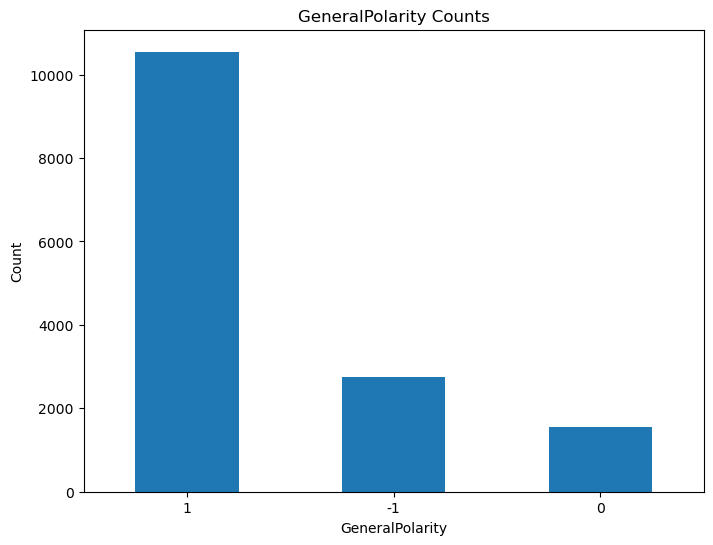

In [153]:
# GeneralPolarity의 값별로 개수를 집계합니다.
polarity_counts = df['GeneralPolarity'].value_counts()

# 바 차트로 시각화합니다.
plt.figure(figsize=(8, 6))
polarity_counts.plot(kind='bar')
plt.title('GeneralPolarity Counts')
plt.xlabel('GeneralPolarity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # X축 라벨을 수평으로 설정
plt.show()

In [162]:
# 'GeneralPolarity' 열의 값이 0인 행을 찾아 해당 값을 -1로 변경
df.loc[df['GeneralPolarity'] == 0, 'GeneralPolarity'] = -1

# 변경 후 데이터프레임 길이 출력
print(len(df['GeneralPolarity']))

print("GeneralPolarity가 -1인 개수:", len(df[df['GeneralPolarity'] == -1]))

14835
GeneralPolarity가 -1인 개수: 4289


In [155]:
# null값 체킹
print(df.isnull().values.any()) # False
print(review_df.isnull().values.any()) #True
 
print(review_df.isnull().sum())

False
True
id            0
name       1000
date          0
content     191
dtype: int64


In [156]:
review_df['content'] = review_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

review_df = review_df.dropna(how = 'any')

print(len(review_df))

print(review_df.head())

32410
              id                                               name  \
0  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
1  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
2  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
3  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
4  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   

         date                                            content  
0  2023.11.30  피부타입 : 복합성요 토너 없이는 못살아요겨울 강철 추위도 버티게 해주는 저의 최애...  
1  2023.11.28  다른 토너로 갈아탔다가 환절기 때 피부가 뒤집어지고 너무 안 돌아와서 다시 구매합니...  
2  2023.11.26  전 이거 하나로 흡토, 닦토 다 하고 있어요 자극없이 순하고 용량도 많아서 밤마다 ...  
3  2023.11.19    자극없이 순하고 결 정돈하기 좋은 토너예요👍🏻민감성 지성 복합성 다 두루 쓰기 좋아요  
4  2023.11.11  이제는 제 화장대에 없는게 말이 안되는 재구매템정말이지 공병만 몇 십병 만들었을거에...  


In [157]:
df['RawText'] = df['RawText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
df['RawText'] = df['RawText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
df['RawText'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
df = df.dropna(how='any') # Null 값 제거

print('전처리 후 학습 데이터 수 :',len(df))

# 라벨링 된 데이터를 train - test data set으로 분할.

X_train, X_test, y_train, y_test = train_test_split(df['RawText'], df['GeneralPolarity'], test_size=0.2, random_state=42)

print(f"훈련 데이터 수: {len(X_train)}")
print(f"테스트 데이터 수: {len(X_test)}")

전처리 후 학습 데이터 수 : 14835
훈련 데이터 수: 11868
테스트 데이터 수: 2967


In [158]:

pipeline = Pipeline([
    ("tfidf_vect", TfidfVectorizer(stop_words="english", ngram_range=(1,2) ) ),
    ("LR", LogisticRegression(C=10) )
])

# 학습/예측/평가
pipeline.fit(X_train, y_train)

pred = pipeline.predict(X_test)
pred_prob = pipeline.predict_proba(X_test)[:,1]

acc_lr = accuracy_score(y_test, pred)
auc_lr = roc_auc_score(y_test, pred_prob)

print(f"예측 정확도: {acc_lr:.4f}, ROC-AUC: {auc_lr:.4f}")

C:\Users\youwj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도: 0.9036, ROC-AUC: 0.9429


In [159]:
# 학습시킨 모델을 통해 올리브영 댓글에 적용
review_df['sentiment'] = pipeline.predict(review_df['content'])

In [160]:
print(review_df)

                  id                                               name  \
0      A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
1      A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
2      A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
3      A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
4      A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
...              ...                                                ...   
33595  A000000139057                            아벤느 이드랑스 딥 모이스트로션 200ml   
33596  A000000139057                            아벤느 이드랑스 딥 모이스트로션 200ml   
33597  A000000139057                            아벤느 이드랑스 딥 모이스트로션 200ml   
33598  A000000139057                            아벤느 이드랑스 딥 모이스트로션 200ml   
33599  A000000139057                            아벤느 이드랑스 딥 모이스트로션 200ml   

             date                                            content  \
0      2023.11.30  피부타입 : 복

In [161]:
# 'sentiment' 열을 기준으로 긍정 및 부정 리뷰의 개수 집계
sentiment_counts = review_df['sentiment'].value_counts()

print("긍정 리뷰 개수:", sentiment_counts.get(1, 0))  
print("부정 리뷰 개수:", sentiment_counts.get(-1, 0))  

긍정 리뷰 개수: 29044
부정 리뷰 개수: 3366


In [ ]:
review_df.to_csv('review.csv', index=False, encoding='utf-8-sig')